<a href="https://colab.research.google.com/github/Sreyosee/Machine-Learning-Tasks/blob/main/Task1_Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Student Score Prediction

# Library Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Data import

In [ ]:
df = pd.read_csv("/student_scores_1500.csv")

In [ ]:
print(df.head())
print(df.info())

   Hours  Scores
0   4.37     0.0
1   9.56    71.0
2   7.59    24.0
3   6.39    15.0
4   2.40    22.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   1500 non-null   float64
 1   Scores  1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB
None


# Cleaning the dataset

In [ ]:
print("Shape before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape before removing duplicates: (1500, 2)
Shape after removing duplicates: (1452, 2)


#Data Visualization

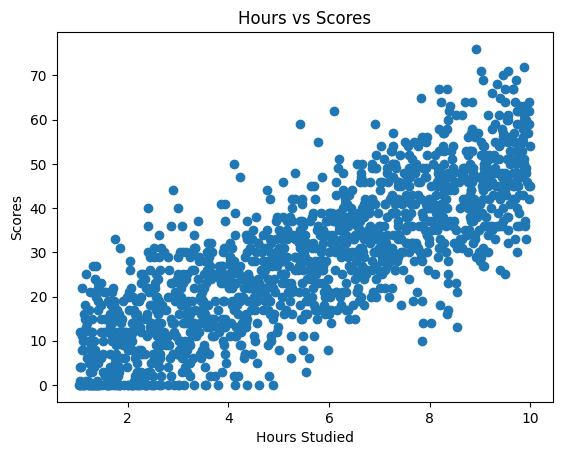

In [ ]:
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

# Feature & Target

In [ ]:
X = df[['Hours']]
y = df['Scores']

# Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predictions

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
hours_studied = pd.DataFrame([[9.25]], columns=['Hours'])
predicted_score = model.predict(hours_studied)
print(f"For {hours_studied['Hours'][0]} hours of study, the predicted score is: {predicted_score[0]:.2f}")

For 9.25 hours of study, the predicted score is: 46.92


# Evaluation

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
MAE: 7.65
MSE: 88.69
RMSE: 9.42
R² Score: 0.67


# Visualization of regression line

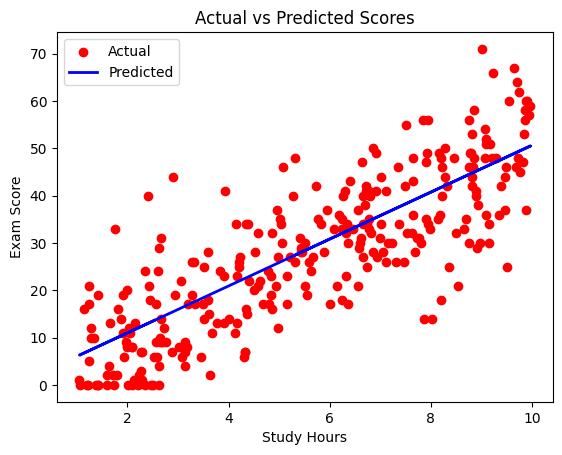

In [ ]:
plt.scatter(X_test, y_test, color='red', label="Actual")
plt.plot(X_test, y_pred, color='blue', linewidth=2, label="Predicted")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.title("Actual vs Predicted Scores")
plt.show()